# Image manipulation in python
a notebook to learn a few basics about image manipulation

the first snippet of code is to check whether packages that we need are installed and it will install these when not found

In [1]:
import importlib.metadata, subprocess, sys
required  = {'aicsimageio', 'scikit-image', 'numpy==1.26.3'
}
installed = {pkg.metadata['Name'] for pkg in importlib.metadata.distributions()}
missing   = required - installed

if missing:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', '--upgrade', 'pip'])
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', *missing])

next we will load the packages that we need

In [2]:
from matplotlib import pyplot as plt
from aicsimageio import AICSImage
from skimage.io import imshow
from skimage.filters import gaussian, threshold_otsu, median

## Load and Display an Image
Loading a sample image and displaying it using matplotlib

In [3]:
# load an nd2 file
img = AICSImage('../data/nd2/WT_001.nd2')
data = img.get_image_data("TCZYX")  # Choose the correct dimension order

# pick the first timepoint and z-slice
t_index = 0
z_index = 0

In [5]:
# extract meta data, i.e. size of voxel in µm
def get_voxel_size_from_aics_image(aics_image):
    return (aics_image.physical_pixel_sizes.Z,
            aics_image.physical_pixel_sizes.Y,
            aics_image.physical_pixel_sizes.X)

## Basic Image Transformations
Performing basic image manipulations like rotation, resizing, and cropping

length in x: 281.90 µm
length in y: 211.43 µm


C:\Users\Filip\AppData\Local\Temp\ipykernel_15964\2707920408.py:11: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(gphn)
C:\Users\Filip\PycharmProjects\imageAnalysis\.venv\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


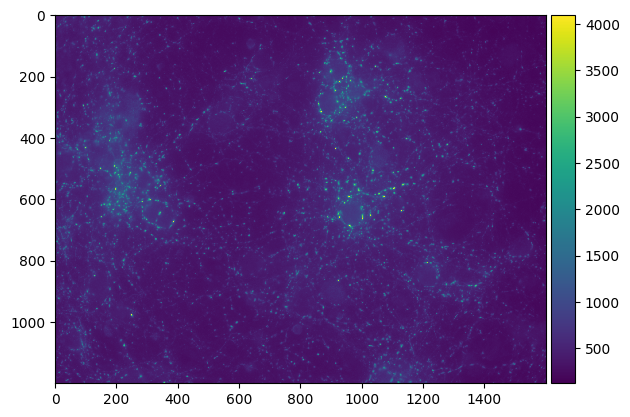

In [6]:
# Let's start working with one channel, mScarlet-gephyrin
gphn = data[t_index, 1, z_index, :, :]
voxel = get_voxel_size_from_aics_image(img)

x_dimension = data.shape[4] * voxel[1]
y_dimension = data.shape[3] * voxel[1]

print(f"length in x: {x_dimension:.2f} µm")
print(f"length in y: {y_dimension:.2f} µm")

imshow(gphn)
plt.show()



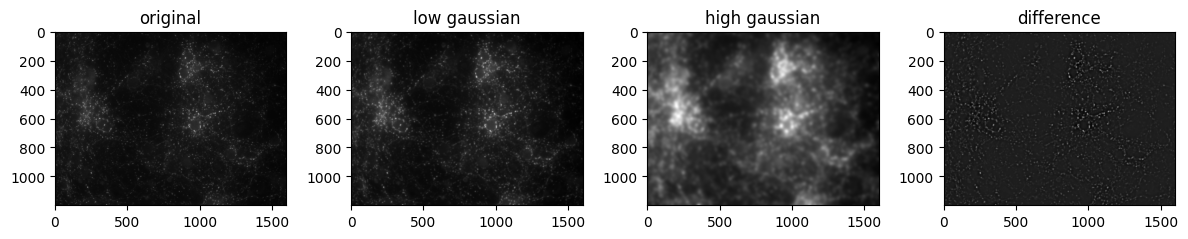

In [7]:
# Process Gphn channel (Difference of Gaussian)
low = gaussian(gphn, sigma=2)
high = gaussian(gphn, sigma=10)
dog = low - high

# make a quick figure to display individual channels
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

axes[0].imshow(gphn, cmap='gray')
axes[0].set_title("original")

axes[1].imshow(low, cmap='gray')
axes[1].set_title("low gaussian")

axes[2].imshow(high, cmap='gray')
axes[2].set_title("high gaussian")

axes[3].imshow(dog, cmap='gray')
axes[3].set_title("difference")

plt.tight_layout()
plt.show()


dog = dog - gaussian(dog, sigma=10)  # Subtract background